In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_dataset = pd.read_csv('car data.csv')

In [5]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(car_dataset.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [10]:
print(car_dataset.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [11]:
print(car_dataset.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\niran\AppData\Local\Temp\ipykernel_12472\3875546958.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [13]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\niran\AppData\Local\Temp\ipykernel_12472\839709845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [15]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [19]:
X_train, X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [20]:
lin = LinearRegression()

In [21]:
lin.fit(X_train, Y_train)

LinearRegression()

In [22]:
training_data_prediction = lin.predict(X_train)

In [23]:
error_score = metrics.r2_score(training_data_prediction,Y_train)

In [24]:
error_score

0.8635655509198954

Text(0, 0.5, 'predicted prices')

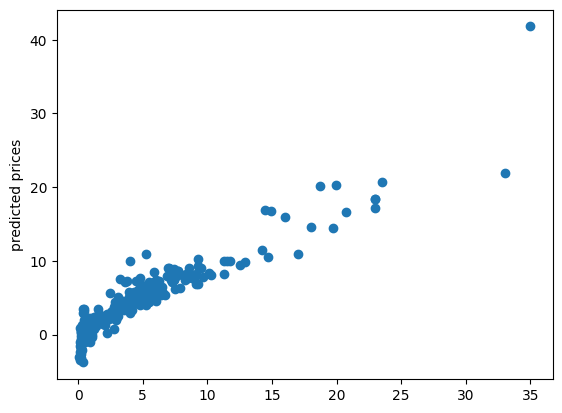

In [29]:
plt.scatter(Y_train,training_data_prediction)
plt.ylabel('predicted prices')

In [30]:
test_data_prediction = lin.predict(X_test)

In [31]:
error_score = metrics.r2_score(test_data_prediction,Y_test)
error_score

0.8062199941176169

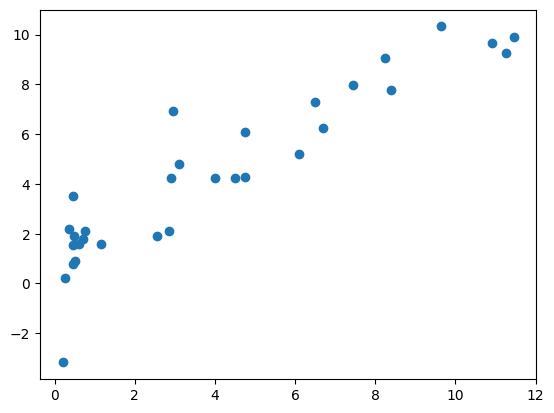

In [32]:
plt.scatter(Y_test,test_data_prediction)

In [33]:
las=Lasso()

In [34]:
las.fit(X_train, Y_train)

Lasso()

In [35]:
training_data_prediction = las.predict(X_train)

In [36]:
error_score = metrics.r2_score(training_data_prediction,Y_train)

In [37]:
error_score

0.798459024070425

Text(0, 0.5, 'predicted prices')

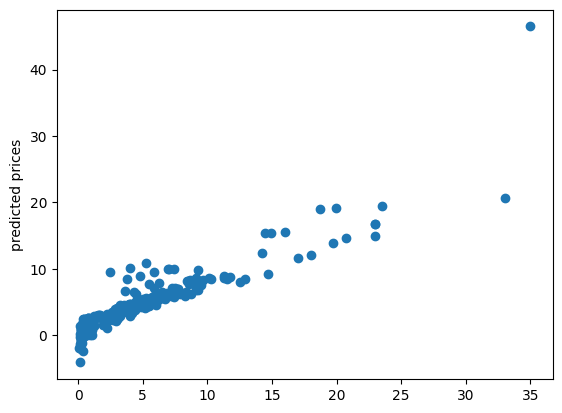

In [38]:
plt.scatter(Y_train,training_data_prediction)
plt.ylabel('predicted prices')